In [20]:
import pandas as pd
import numpy as np

In [21]:
occupancy = pd.read_csv('occupancy.csv')
occupancy.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/2/2015 14:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2/2/2015 15:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2/2/2015 16:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2/2/2015 17:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2/2/2015 18:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [27]:
occupancy.shape

(2664, 7)

In [23]:
type(occupancy['date'][0])

str

In [24]:
occupancy['date'] = pd.to_datetime(occupancy['date'])
occupancy.index = pd.DatetimeIndex(occupancy.date, freq='H')
occupancy.index

DatetimeIndex(['2015-02-02 14:00:00', '2015-02-02 15:00:00',
               '2015-02-02 16:00:00', '2015-02-02 17:00:00',
               '2015-02-02 18:00:00', '2015-02-02 19:00:00',
               '2015-02-02 20:00:00', '2015-02-02 21:00:00',
               '2015-02-02 22:00:00', '2015-02-02 23:00:00',
               ...
               '2015-05-24 04:00:00', '2015-05-24 05:00:00',
               '2015-05-24 06:00:00', '2015-05-24 07:00:00',
               '2015-05-24 08:00:00', '2015-05-24 09:00:00',
               '2015-05-24 10:00:00', '2015-05-24 11:00:00',
               '2015-05-24 12:00:00', '2015-05-24 13:00:00'],
              dtype='datetime64[ns]', name='date', length=2664, freq='H')

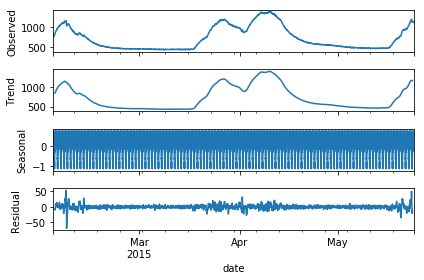

In [8]:
import statsmodels.api as sm
%matplotlib inline 
res = sm.tsa.seasonal_decompose(occupancy['CO2'])
resplot = res.plot()

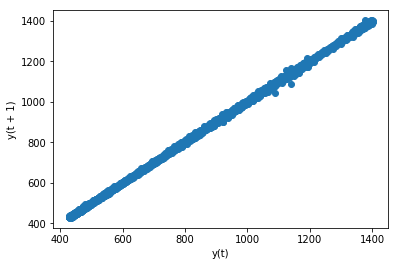

In [25]:
from pandas.plotting import lag_plot

lag_plot(occupancy.CO2)

In [32]:
from statsmodels.tsa.ar_model import AR

train, test = occupancy.CO2[:-10], occupancy.CO2[-10:]
model = AR(occupancy.CO2)
model_fit = model.fit(maxlag=1)
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

In [33]:
print(model_fit.params)

const     0.001078
L1.CO2    1.000195
dtype: float64


In [34]:
pd.DataFrame({'observed':test, 'predicted':predictions})

,observed,predicted
date,,
2015-05-24 04:00:00,1153.250000,1152.725379
2015-05-24 05:00:00,1152.400000,1153.475525
2015-05-24 06:00:00,1146.166667,1152.625359
2015-05-24 07:00:00,1145.400000,1146.390813
2015-05-24 08:00:00,1140.800000,1145.623997
2015-05-24 09:00:00,1150.250000,1141.023102
2015-05-24 10:00:00,1129.200000,1150.474941
2015-05-24 11:00:00,1125.800000,1129.420844
2015-05-24 12:00:00,1123.000000,1126.020182


In [15]:
from statsmodels.tsa.stattools import adfuller

adfuller(occupancy.CO2)[1]

0.06822624483241077

In [16]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(occupancy.CO2, order=(0, 1))
model_fit = model.fit(disp=False)
predictions = model_fit.predict(len(occupancy.CO2)-3, len(occupancy.CO2)-1)

In [17]:
pd.DataFrame({'observed':occupancy.CO2[-3:], 'predicted':predictions})

,observed,predicted
date,,
2015-05-24 11:00:00,1125.8,926.767714
2015-05-24 12:00:00,1123.0,915.383885
2015-05-24 13:00:00,1124.0,923.902279


In [18]:
from statsmodels.tsa.arima_model import ARMA

# fit model
model = ARMA(occupancy.CO2, order=(2, 1))
model_fit = model.fit(disp=False)
# make prediction
predictions = model_fit.predict(len(occupancy.CO2)-3, len(occupancy.CO2)-1)

In [19]:
pd.DataFrame({'observed':occupancy.CO2[-3:], 'predicted':predictions})

,observed,predicted
date,,
2015-05-24 11:00:00,1125.8,1128.180789
2015-05-24 12:00:00,1123.0,1124.619243
2015-05-24 13:00:00,1124.0,1121.703610
